# **HOMEWORK 5**

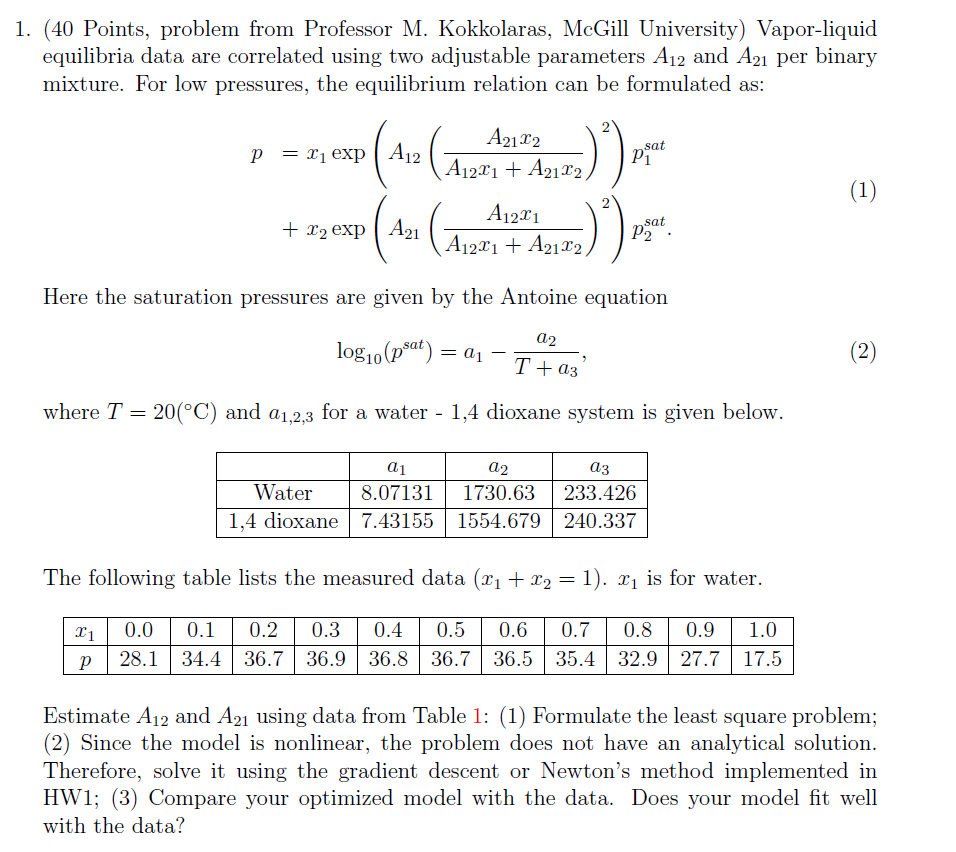

From the condition in the problem, we can use the formula to know the prediction of the pressure, which is

$$
P = x_1 \exp \left( A_{12} \left( \frac{A_{21} x_2}{A_{12}x_1 + A_{21}x_2} \right)^2 \right) P_{\text{1}}^{\text{sat}}
+ x_2 \exp \left( A_{21} \left( \frac{A_{12}x_1}{A_{12}x_1 + A_{21}x_2} \right)^2 \right) P_{\text{2}}^{\text{sat}}.
$$

We also know the actual pressure, then we can formulate this least square problem, which is

$$
\min_{A_{12}, A_{21}} \sum_{i=1}^{11} \left( P_{\text{predict}} (i) - P (i)\right)^2
$$

And to solve the function, we'll proceed with **Gradient Descent Method**


Estimated A12 is 1.93043590 and A21 is 1.71271813
Loss is  0.74188375


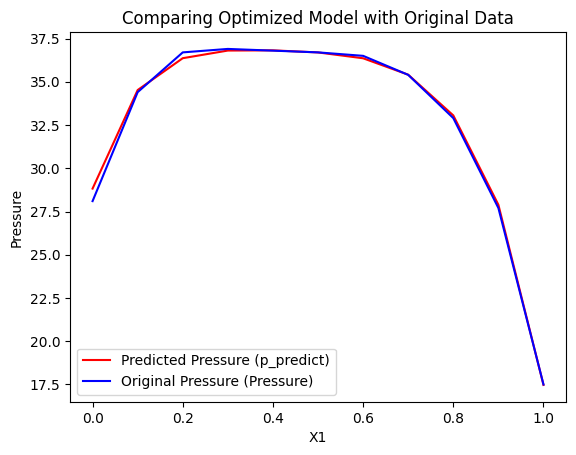

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable

X_1 = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
X_2 = np.array([1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0])
a_water = np.array([8.07131, 1730.63, 233.426])
a_dioxane = np.array([7.43155, 1554.679, 240.337])
T = 20
p_water = 10**(a_water[0] - a_water[1] / (T + a_water[2]))
P_dioxane = 10**(a_dioxane[0] - a_dioxane[1] / (T + a_dioxane[2]))
Pressure = np.array([28.1, 34.4, 36.7, 36.9, 36.8, 36.7, 36.5, 35.4, 32.9, 27.7, 17.5])
Pressure = torch.tensor(Pressure, requires_grad=False, dtype=torch.float32)
A = Variable(torch.tensor([1.0, 1.0]), requires_grad=True)
X1 = torch.tensor(X_1, requires_grad=False, dtype=torch.float32)
Xreverse = torch.tensor(X_2, requires_grad=False, dtype=torch.float32)
learn_rate = .0001

# Optimization process
for i in range(150):
    p_predict = X1 * torch.exp(A[0] * (A[1] * Xreverse / (A[0] * X1 + A[1] * Xreverse))**2) * p_water \
                + Xreverse * torch.exp(A[1] * (A[0] * X1 / (A[0] * X1 + A[1] * Xreverse))**2) * P_dioxane
    Loss = (p_predict - Pressure)**2
    Loss = Loss.sum()
    Loss.backward()
    with torch.no_grad():
        A -= learn_rate * A.grad
        A.grad.zero_()

estimated_A = A.detach().numpy()
Loss_value = Loss.detach().numpy()
print(f'Estimated A12 is {estimated_A[0]:.8f} and A21 is {estimated_A[1]:.8f}')
print('Loss is ', Loss_value)
p_predict = p_predict.detach().numpy()
X1 = X1.detach().numpy()
Pressure = Pressure.detach().numpy()
plt.plot(X1, p_predict, label='Predicted Pressure (p_predict)', color='red')
plt.plot(X1, Pressure, label='Original Pressure (Pressure)', color='blue')
plt.xlabel('X1')
plt.ylabel('Pressure')
plt.legend()
plt.title('Comparing Optimized Model with Original Data')
plt.show()


**Comparing the plots, the predicted model fits well with the original data**






---


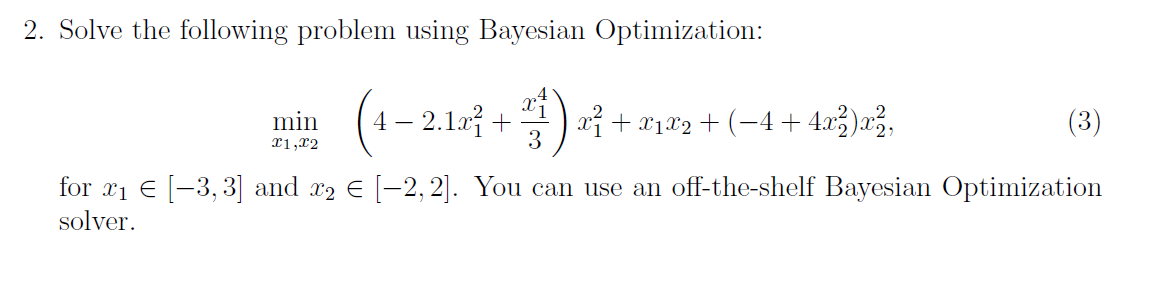

In [ ]:
pip install scikit-optimize


Minimum objective function: -1.0315232958374436
Parameters when having minimum objective function: [0.09193724619632615, -0.7160574906469863]
All evaluated solutions (x1, x2): [[1.7792579211613981, -1.2662608405353448], [1.678146001636617, 0.3874006317859484], [-0.3250034828784525, -1.6001003367279885], [-0.2445066482047964, -0.6651655554439124], [-2.142799092468355, 0.603553891795412], [-2.6615305258373985, 0.8879950890672994], [2.631316254094502, -1.9968849366359427], [2.953269355747306, 0.46992603851086656], [0.6699189629296862, -1.9717347791211304], [-2.8616254497515055, 0.09909864103355703], [-0.6008341697084667, -1.8133373471455383], [2.8425331130487566, -1.0689146382787829], [-2.456361392803075, 0.4735440373323496], [-0.7052280523970227, 1.9329235432271537], [-0.19942264051212, 1.439761626945283], [1.081845231526679, -0.1980029921218276], [-2.920410233040801, 1.768807022739412], [0.3797293070732364, -0.45833398984033513], [-2.904202486678715, -1.0764246975114038], [-1.5538472038

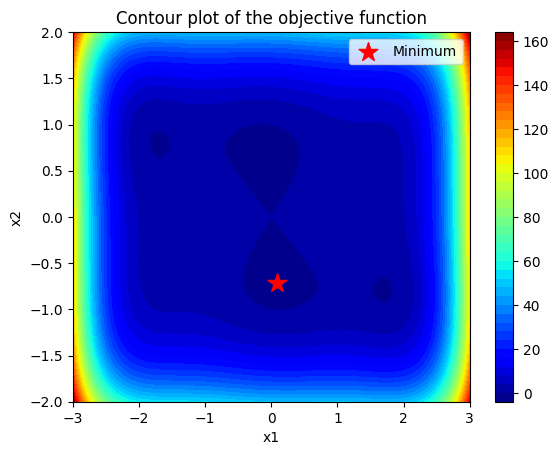

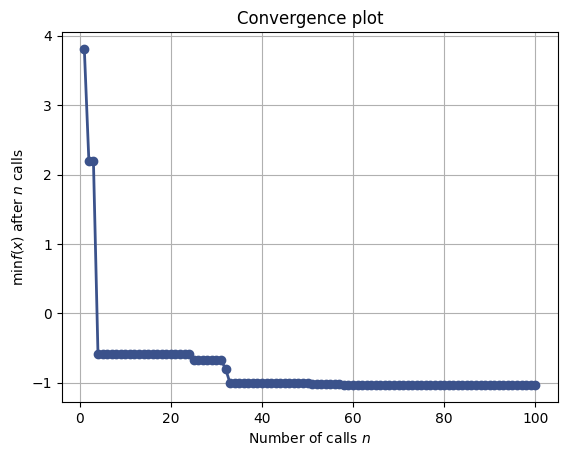

In [ ]:
from skopt import gp_minimize
from skopt.space import Real
from skopt.utils import use_named_args
import numpy as np
import matplotlib.pyplot as plt
from skopt.plots import plot_convergence

space = [Real(-3, 3, name='x1'), Real(-2, 2, name='x2')]

@use_named_args(space)
def objective(**params):
    x1 = params['x1']
    x2 = params['x2']
    return (4 - 2.1 * x1 ** 2 + x1 ** 4 / 3) * x1 ** 2 + x1 * x2 + (-4 + 4 * x2 ** 2) * x2 ** 2

#using off-the-shelf Bayesian Optimization
result = gp_minimize(objective, space, n_calls=100, n_initial_points=20, acq_func="EI", xi=0.01, random_state=42)

print('Minimum objective function:', result.fun)
print('Parameters when having minimum objective function:', result.x)
print('All evaluated solutions (x1, x2):', result.x_iters)
print('Objective function values at evaluated solutions:', result.func_vals)

X1 = np.linspace(-3, 3, 400)
X2 = np.linspace(-2, 2, 400)
x1x2 = np.array([[x1, x2] for x2 in X2 for x1 in X1])
real_loss = np.array([objective(params) for params in x1x2])
C, G = np.meshgrid(X1, X2)
result_grid = real_loss.reshape(C.shape)

plt.figure()
cp = plt.contourf(C, G, result_grid, cmap='jet', levels=50)
plt.colorbar(cp)
plt.scatter(result.x[0], result.x[1], marker='*', c='red', s=200, label='Minimum')
plt.title('Contour plot of the objective function')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

plot_convergence(result)
plt.show()




---



# **ANSYS Optimization**

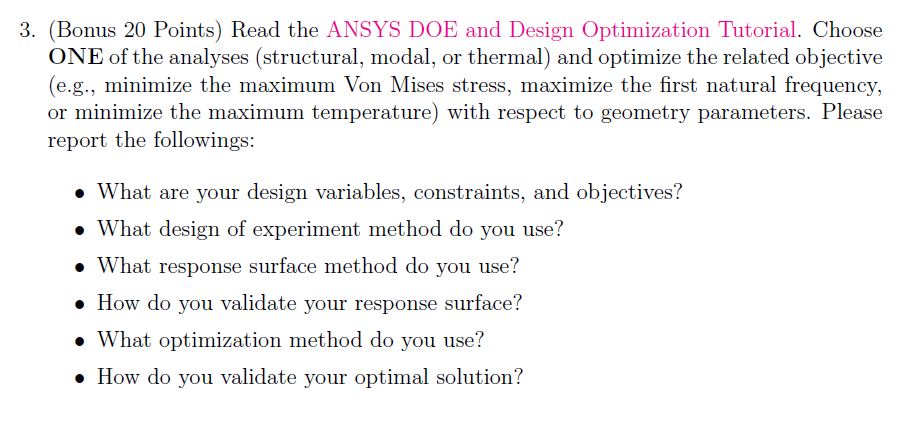

For the solution I've done for two analysis, one for the reduction of volume for brake disc and the other to increased the efficiency of a airfoil

## **Brake disc design optimization**

In this brake disc problem, using the existing brake disc model the objective I kept was

**Objective:**
1.   Minimize the volume
2.   Minimize the maximum Von Mises stress

**Constraints:**
Operating temperature 200°C to 400°C

The problem schematic for brake disc model optimization is shown below, which includes is shown below

*   Static structural
*   Modal
*   Transient thermal

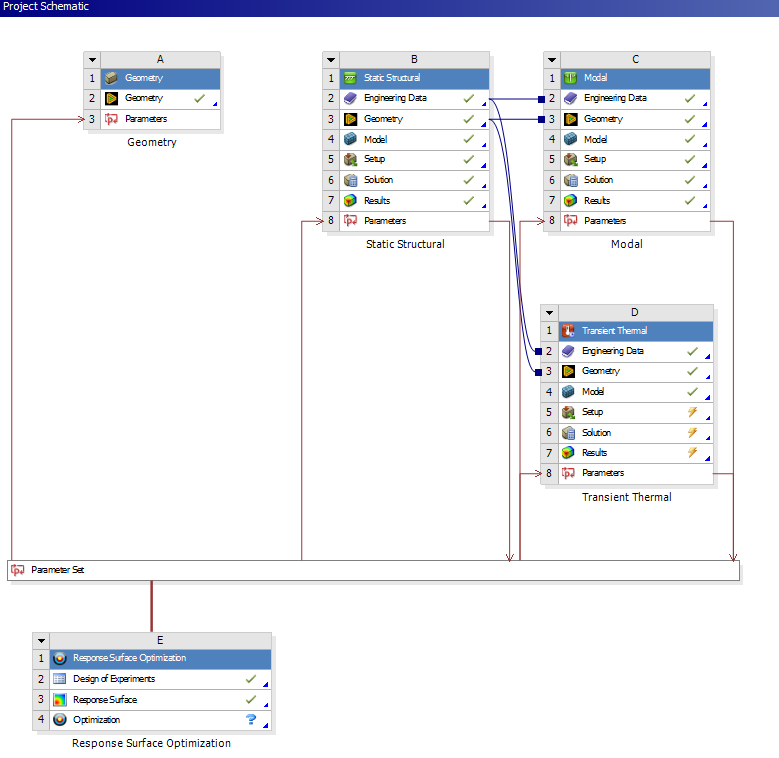

 The brake disc is imported in ANSYS. The design variable of brake disc optimization and their initial values are
 1.   Brake disc thickness (P1) = 25 mm
 2.   Brake dise outer diameter (P2) = 125 mm
 1.   Brake dise inner diameter (P3) = 75 mm


**Results of Static Structural Analysis for initial parameters:**

A static structural analysis was conducted on the brake disc once the constraints and stresses were applied. The brake disc was set to rotate at a velocity of 250 rad/s , while the brake pads were restricted from movement along the X and Z axes. A revolute joint was utilized at the inner diameter of the disc where it interfaces with the shaft. Frictional contact was assumed for the interaction between the brake pads and the disc, with a stress of 1.0495e+07 Pa applied to the surface of the brake pads. The results of the analysis, indicate that the highest stress is 3.744e+07 Pa, occurs in the area where the brake disc and brake pads come into contact.



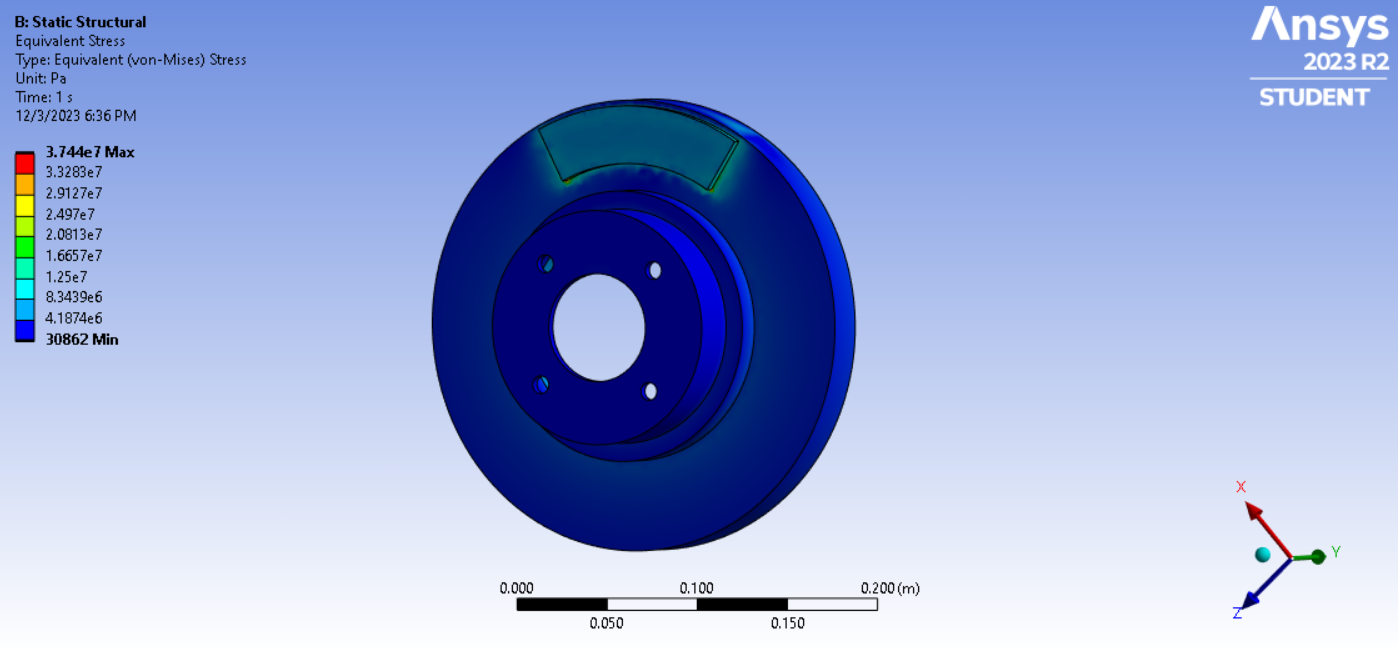

**Results of Modal Analysis for initial parameters:**


The purpose of the thermal analysis is to monitor the highest temperature increase that occurs as a result of the braking process. Initially, the brake disk temperature is set at 35 degrees Celsius. To simulate heat dissipation, convection is assigned to the entire model surface, characterized by a film coefficient of 5 $\frac{\text{W}}{\text{m}^2 \cdot \text{°C}}$ . Additionally, a heat flux of 1.5395 x $10^6 \frac{\text{W}}{\text{m}^2}$ is exerted on both sides of the brake disk. The maximum temperature was found to be 306.44 °C

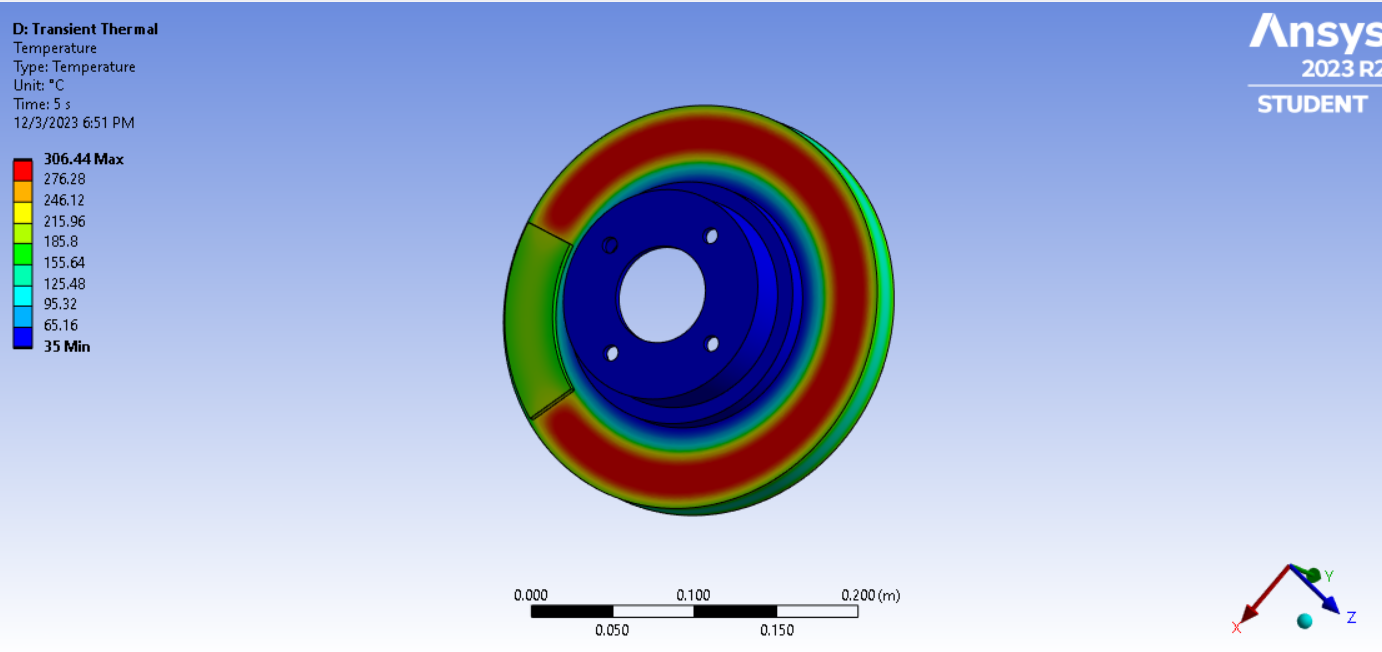

**Results of Modal Analysis for initial parameters:**

On simulating Modal analysis, the natural frequency is found to be 2034.3 Hz and the maximum deformation is found to be 0.77761 m

This was simulated to check the analysis and will not be considered in our objective funcition

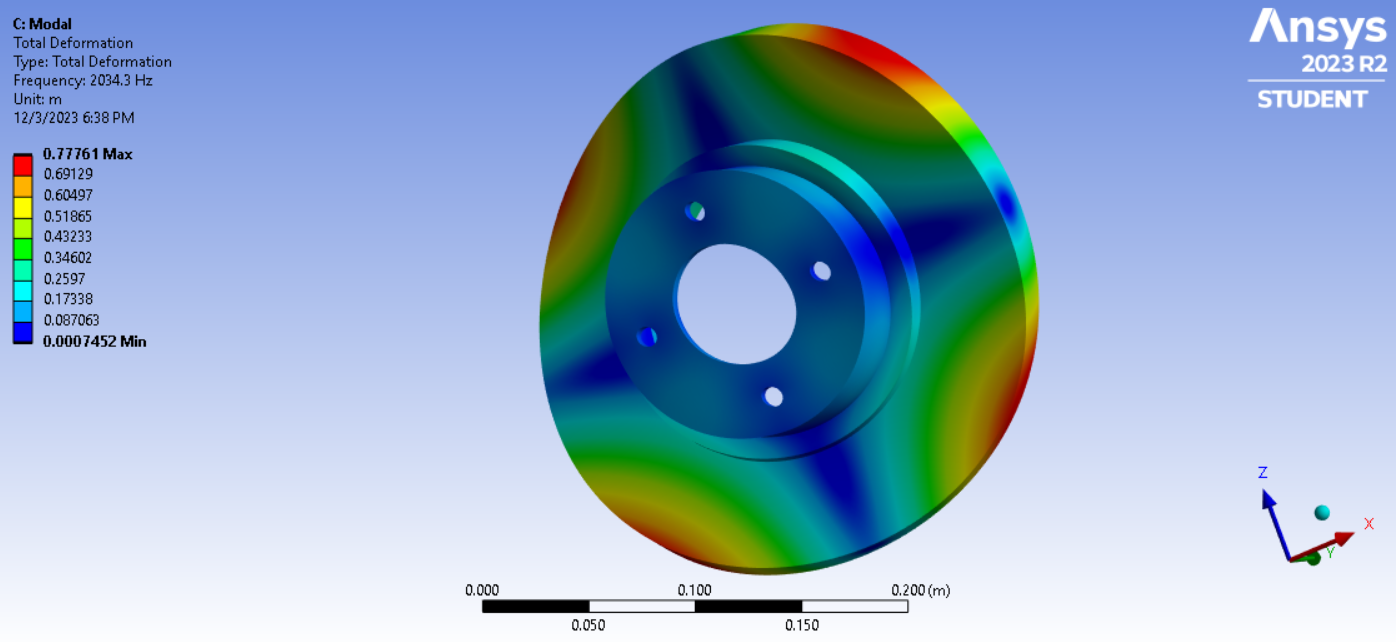

Then Response Surface Optimization block was added from Design Exploration tab, Latin Hypercube Sampling Design was used and 14 design points were created as shown below.

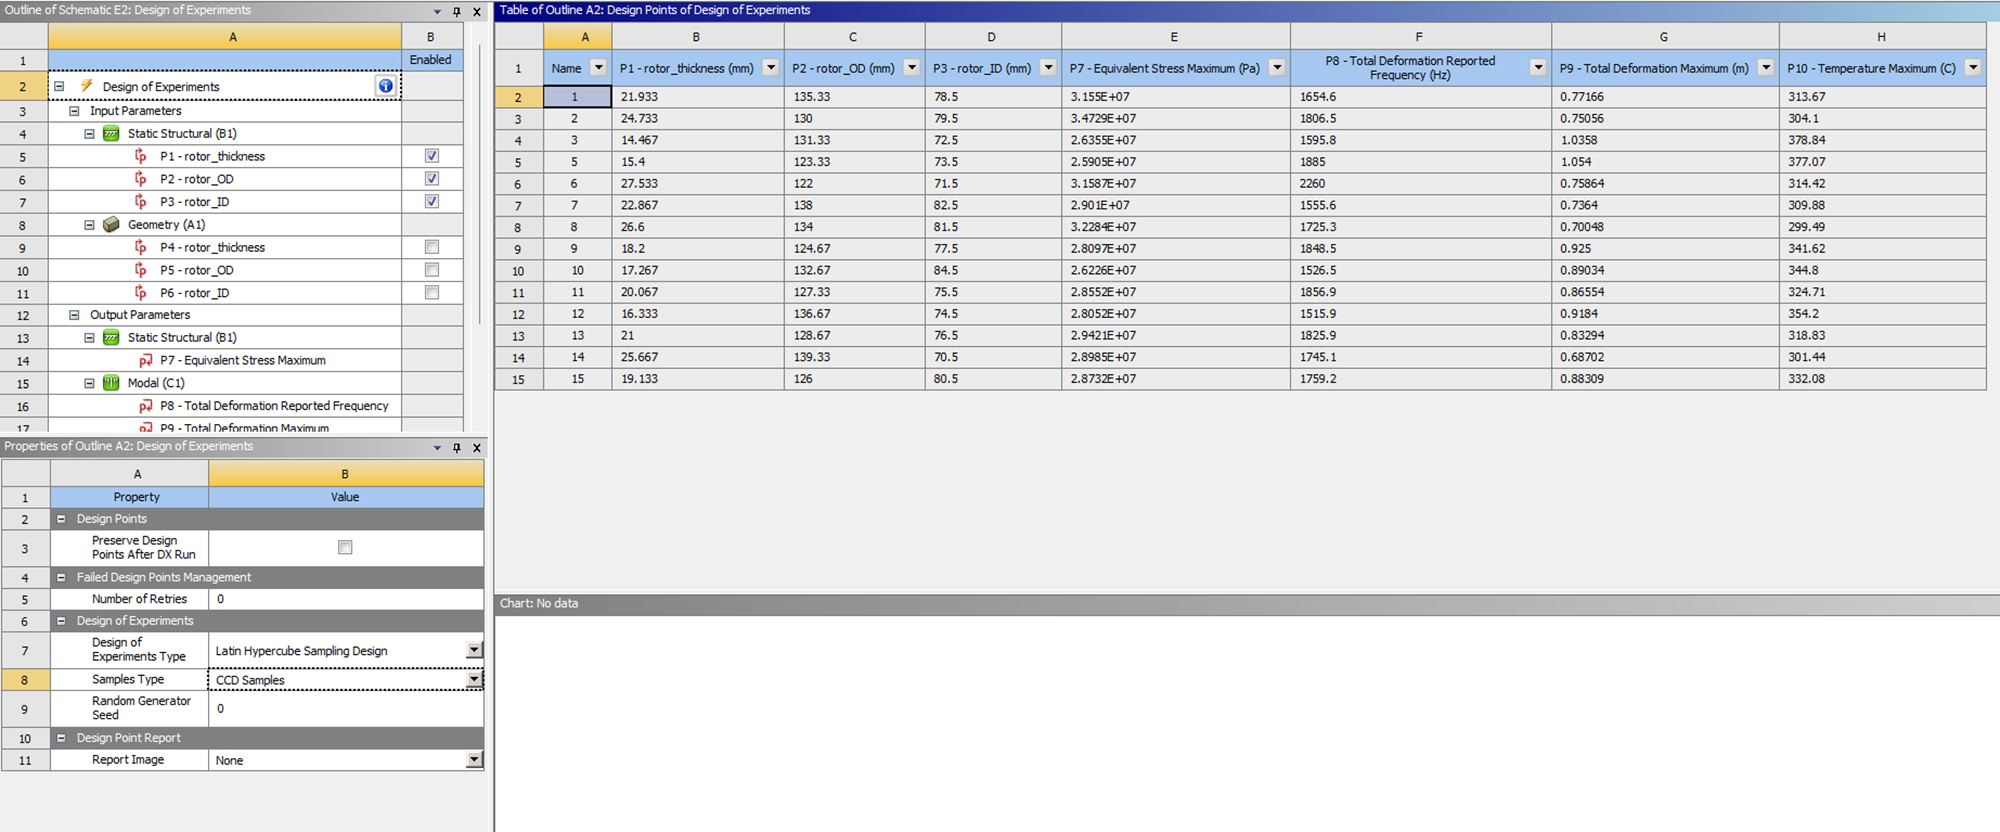

The DOE model is verified by the goodness of fit plot, to verify it four verification points were added

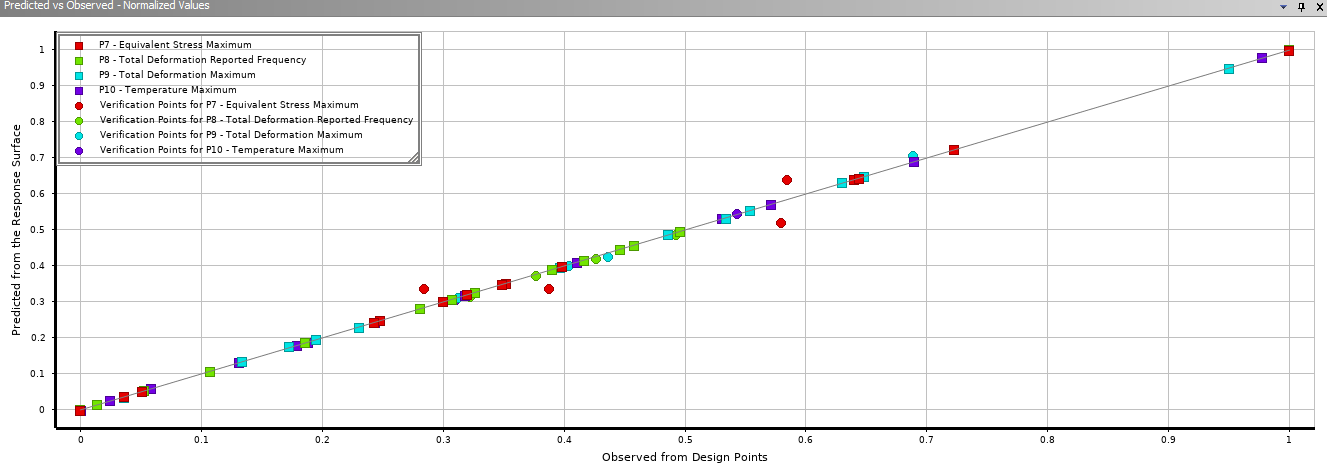

# **Response surface**

The sensitivity charts are shown below

**1. Local Sensitivity chart**

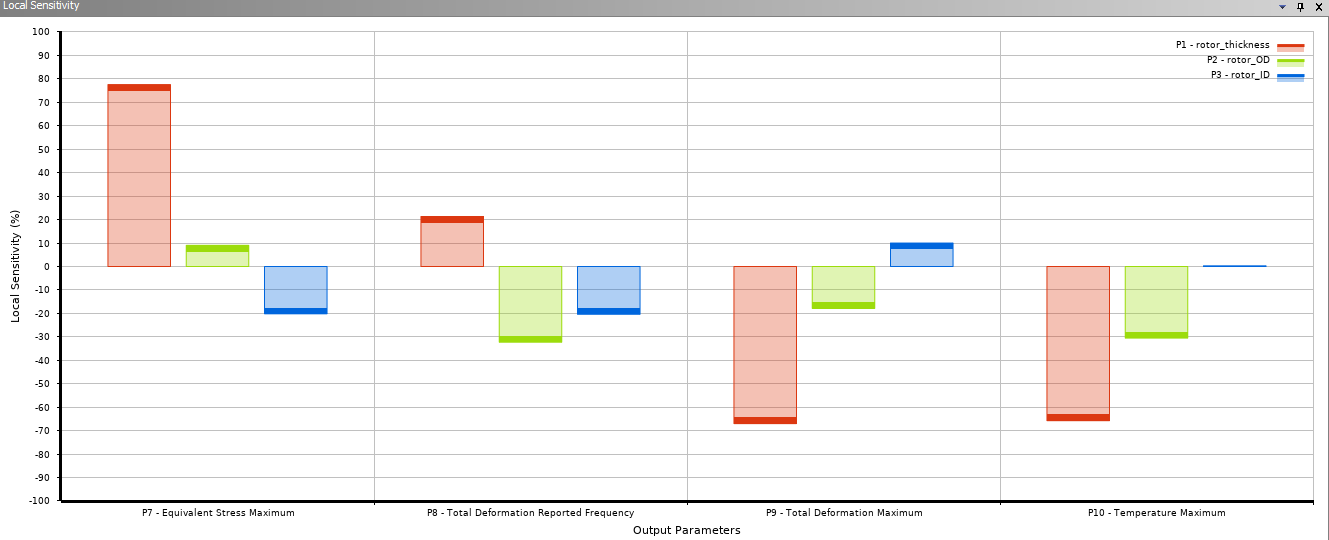


**2. Local sensitivity curve for temperature**
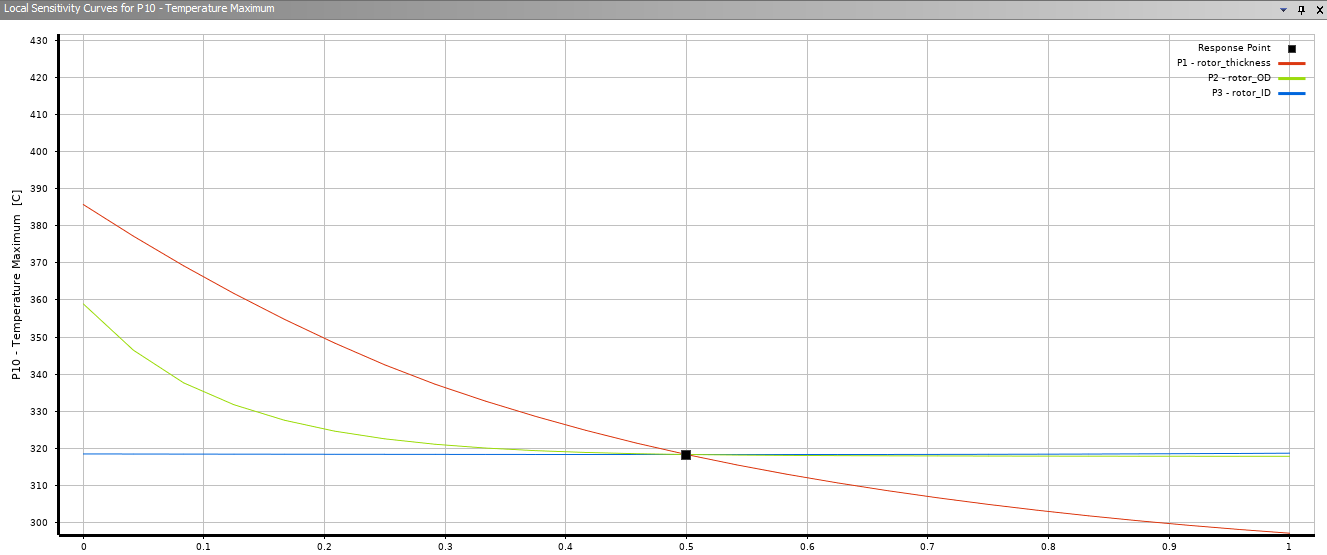

**3. Local sensitivity curve for Stress**
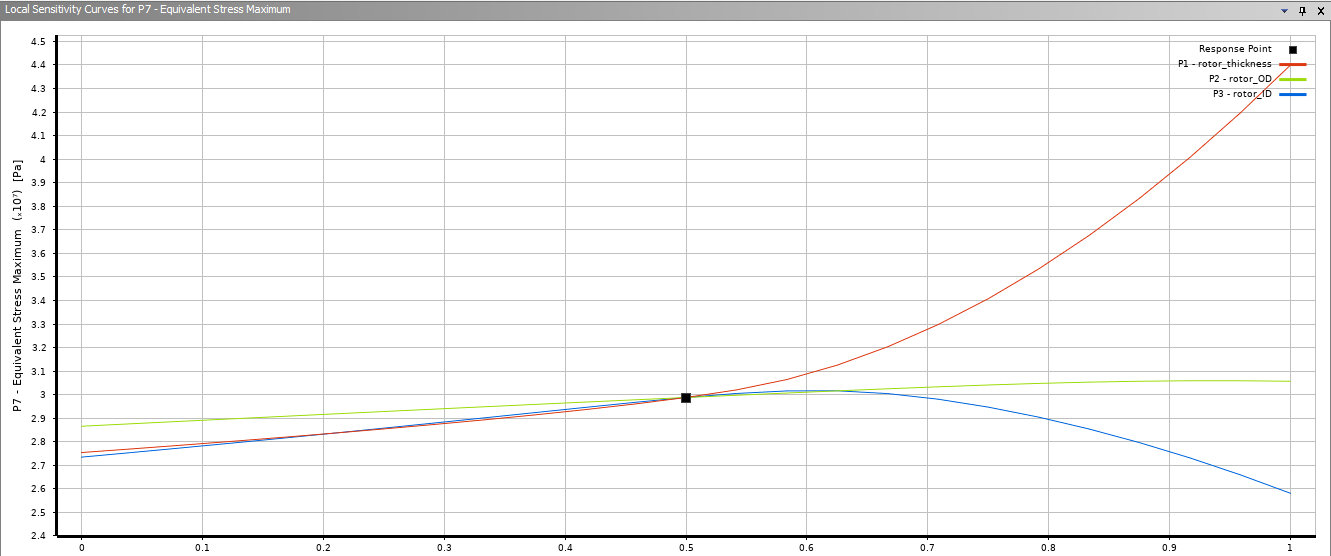


## **Results**
Upon running optimization, the results from Ansys is shown below:

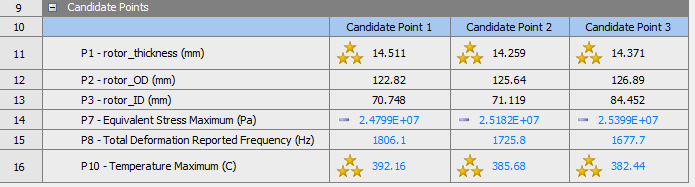

For this objective function and constraints, the results is found to be there is a **volume reduction of 34.14%** (i.e. from 0.00099667 ${\text{m}^3}$ to 0.00065636 ${\text{m}^3}$). Furthermore, the **maximum stress is also decreased by 33.79 %** and the maximum temperature is well within the limits of 200°C to 400°C. The comparison between the initial model and the final model is tabulated below:


$$\begin{array}{|c|c|c|c|c|c|}
\hline
\text{Results} & \text{Brake rotor thickness (mm)} & \text{Rotor OD (mm)} & \text{Rotor ID (mm)} & \text{Volume (m}^3\text{)} & \text{Maximum stress (MPa)} & \text{Temperature (}^\circ\text{C)} \\
\hline
\text{Initial values} & 25 & 125 & 75 & 0.00099667 & 37.44 & 306.44 \\
\hline
\text{Optimized values} & 14.511 & 122.82 & 70.748 & 0.00065636 & 24.79 & 392.16 \\
\hline
\end{array}$$


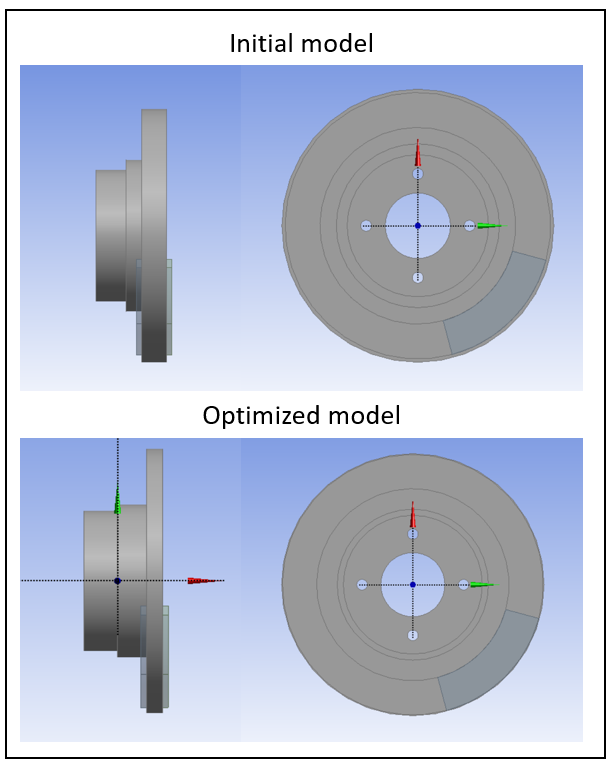



---



## **ANSYS CFD Design Optimization for a simple airfoil model**

A simple airfoil design is been considered with dimensions as shown in the below image

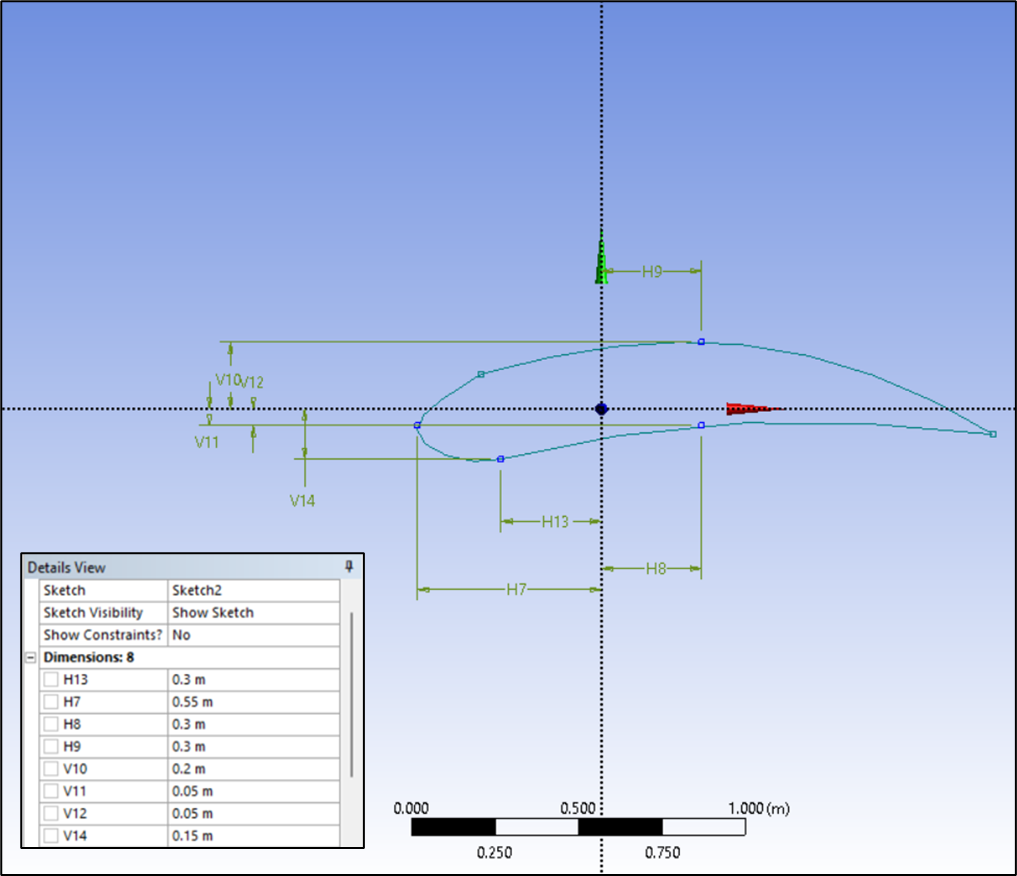

3D generated model with enclosure for running CFD analysis
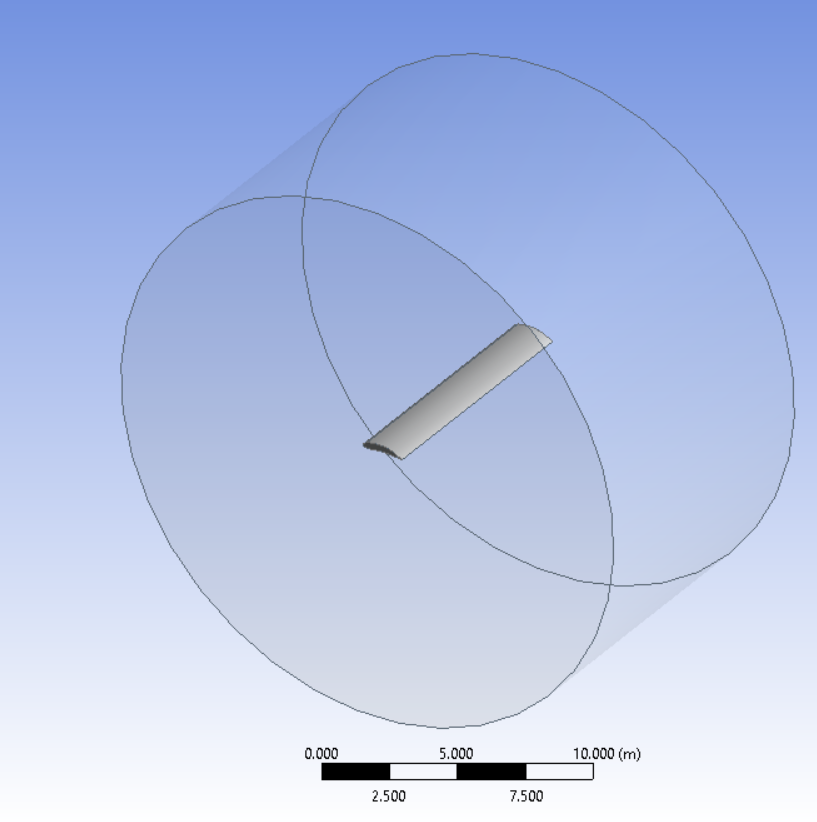


# **ANSYS CFD Design Optimization for a simple airfoil model**

A simple airfoil design is been considered with dimensions as shown in the below image

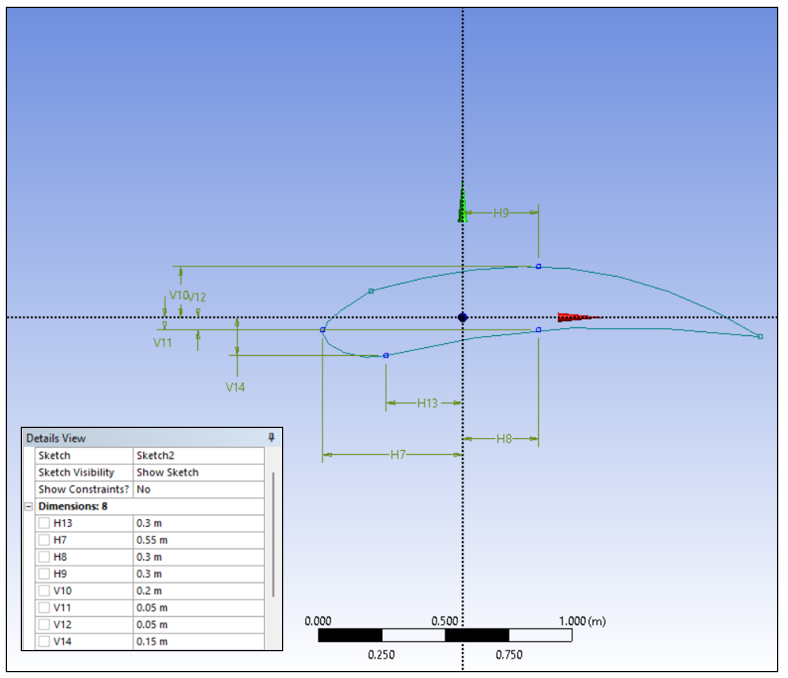

3D generated model with cylindrical enclosure for running CFD analysis

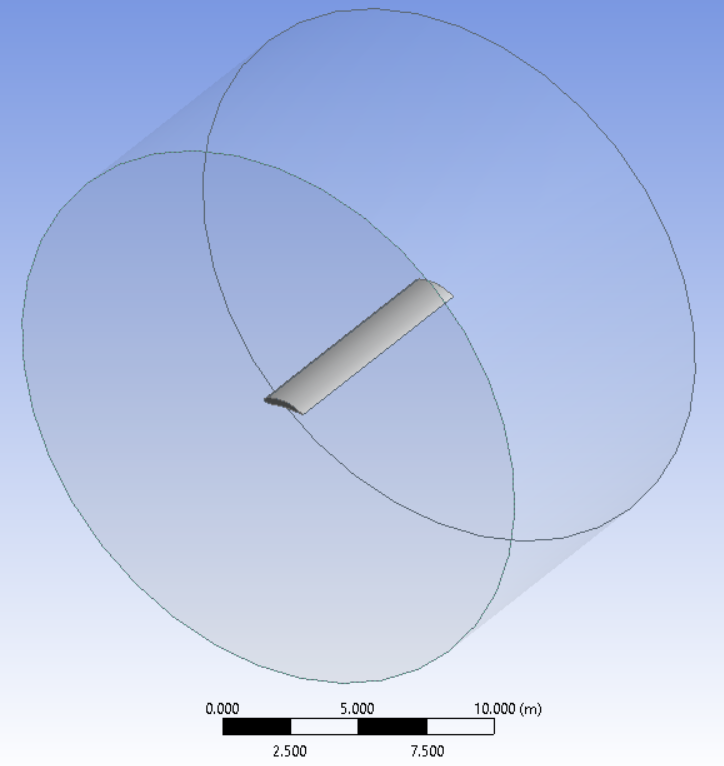

**CFD analysis for drag force, lift force and efficiency:**

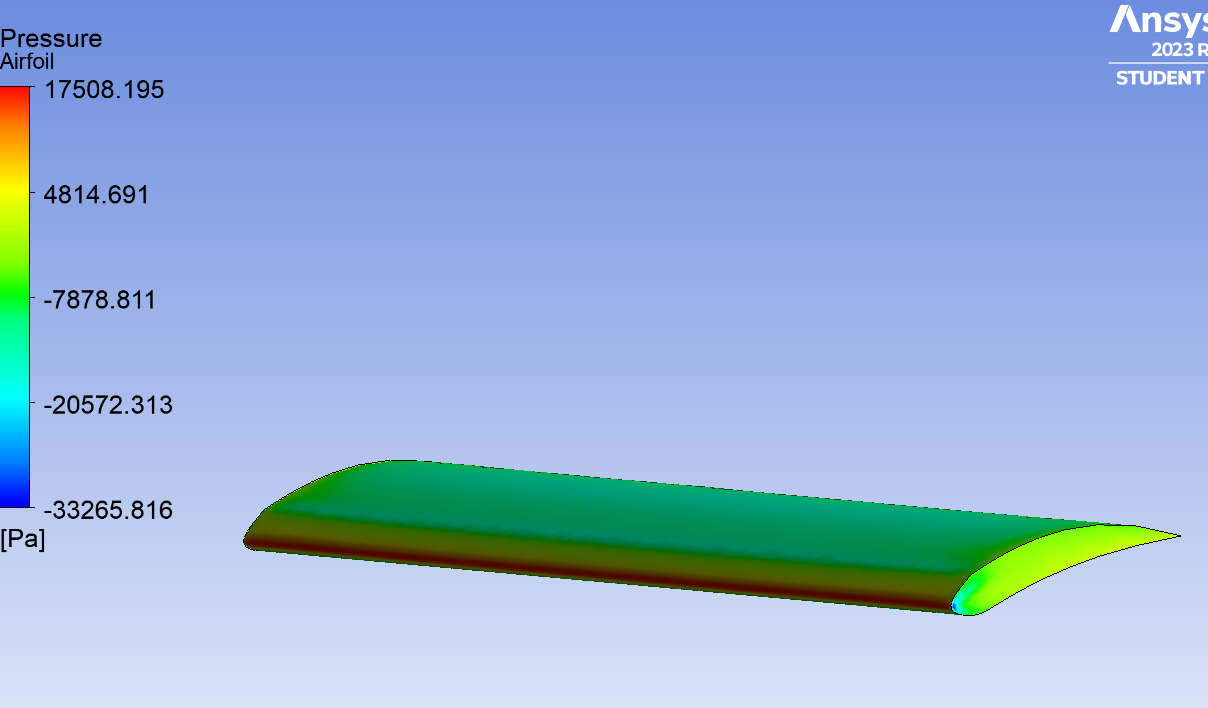


Then Response Surface Optimization block was added from Design Exploration tab, Central Composite Design was used and 45 design points were created as shown below.

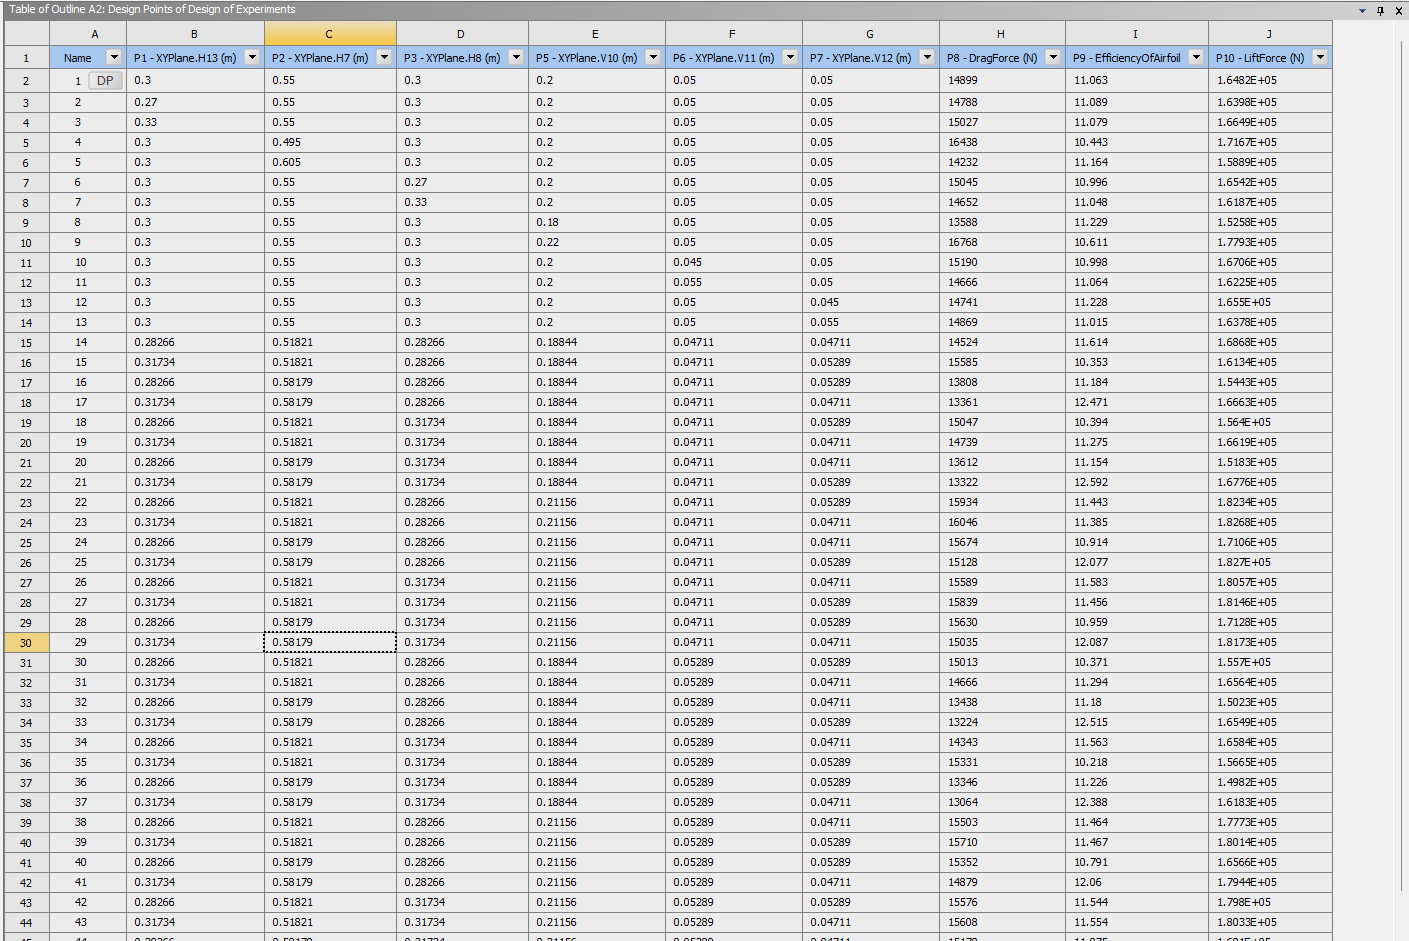

The goodness of fit graph is shown below and it can be inferred that the DOE data is fitting well

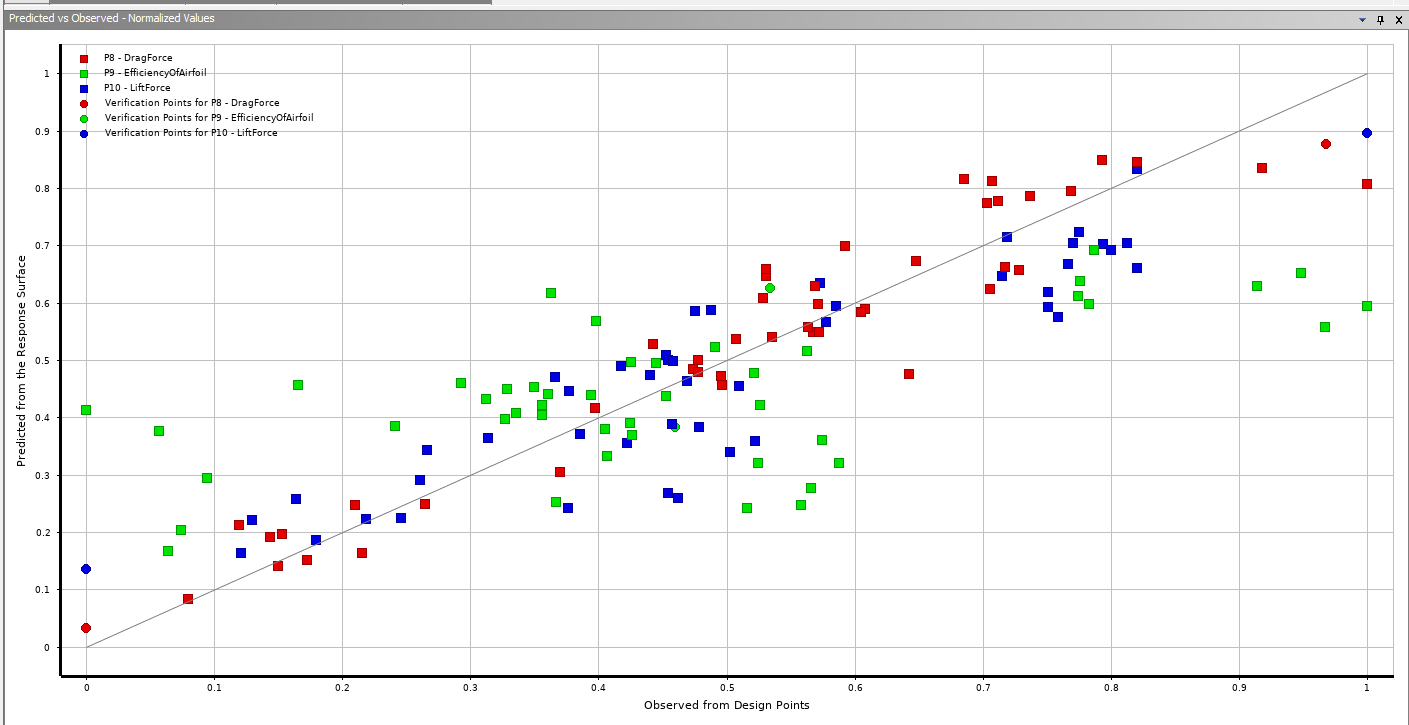

The sensitivity chart for the parameters is shown below.

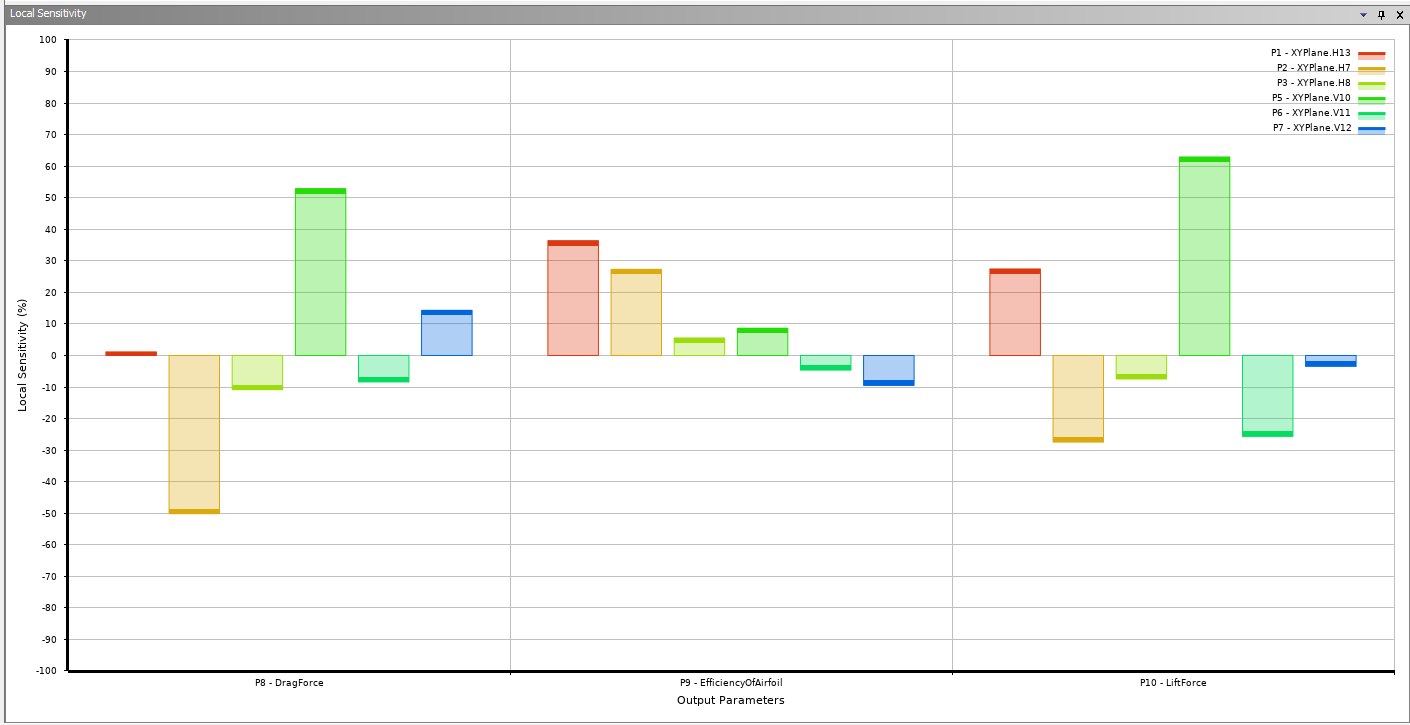


# **Results**

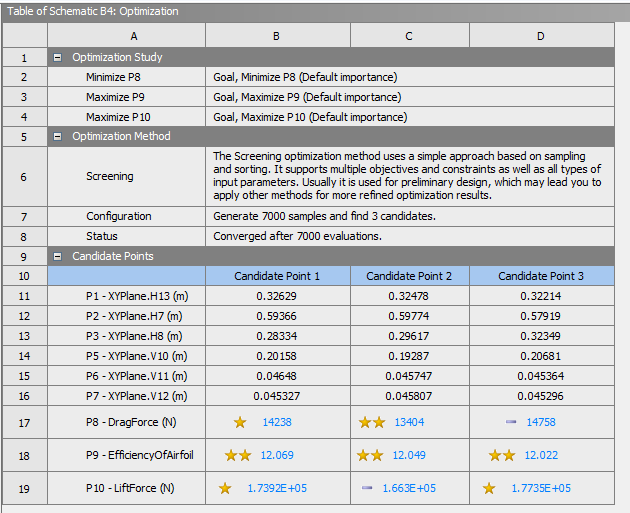

From the results we can infer that the **efficiency has increase by 8.34 %**. The detailed comparison of the results are tabulated below

$$\begin{array}{|l|c|c|c|}
\hline
\textbf{Results} & \textbf{Drag Force (N)} & \textbf{Lift Force (N)} & \textbf{Efficiency} \\
\hline
\text{Initial values} & 14898.5 & 164818 & 11.0627 \\
\hline
\text{Optimized values} & 14238 & 173920 & 12.069 \\
\hline
\end{array}$$


